# California Housing Prices [Linear Regression Model]
_____________

#### Steps :
   - Import dataset
   - Cleaning
   - Dealing with the Outliers
   - EDA
   - Define x , y 
   - Split Dataset [ train - test ]
   - Buid and train model
   - Predict the test 
   - Evaluate model

### Data manipulation libraries:

In [1]:
import numpy as np
import pandas as pd

### Visualization libraries:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px                         
import matplotlib.image as mpimg
%matplotlib inline

### ML libraries:

In [3]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression           #build model
from sklearn.model_selection import train_test_split        #data splitting

## Exploring the data

### Load Dataset
#### Read the `housing.csv` dataset into an object named `df`

In [4]:
df = pd.read_csv('housing.csv')

In [5]:
# Shows the number of rows and columns in the data
df.shape

(20640, 10)

#### Using `.head()` to look at the first five rows of the data set.

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### using `.info` to explore columns index, columns names, non-Null count values and data type in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
 # Sum total of the null values 
df.isnull().sum().sum()

207

####  `.isna().sum()` to sum the null values in the dataset for each column.

In [9]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### Using `.describe()` to see the statistics of our values

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
df['ocean_proximity'].unique() #show unique Row in column

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
df.ocean_proximity= df.ocean_proximity.str.replace('<', 'less ') # replace symbol < to 'less' in Row
df.ocean_proximity.unique()

array(['NEAR BAY', 'less 1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [13]:
bedroom_median = df['total_bedrooms'].median()
bedroom_median

435.0

In [14]:
df['total_bedrooms'].fillna(bedroom_median, inplace=True) # fill the null values with bedroom_median

#### Using `.tail()` to look at the last five rows of the data set.

In [15]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


####  `.duplicated().sum()` to sum the duplicated values in the dataset.

In [16]:
df.duplicated().sum()

0

In [17]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### The result of `.value_counts()` is the **ocean_proximity** column's values as its index.

In [18]:
df['ocean_proximity'].value_counts()

less 1H OCEAN    9136
INLAND           6551
NEAR OCEAN       2658
NEAR BAY         2290
ISLAND              5
Name: ocean_proximity, dtype: int64

## Dealing with the Outliers

#### Defining a function called `plot_outliers` to show the outliers in my plots.
#### Defining a function called `plot_hist` to visualize, and we will use it in visualizing the outliers.

In [19]:
def plot_outliers(df,col):
    plt.title(col)
    ax = sns.boxplot(data=df, x=col)
    ax.set(xlabel='')
    plt.show()

def plot_hist(df,col):
    plt.hist(x=df[col],bins=40,color='#D11239')
    plt.show();

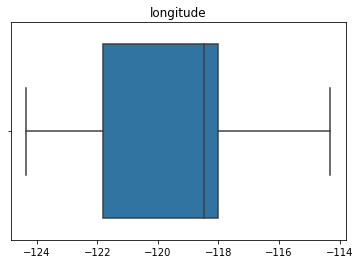

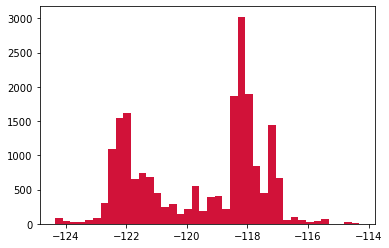

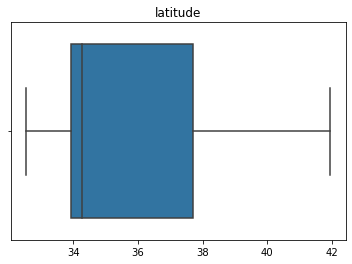

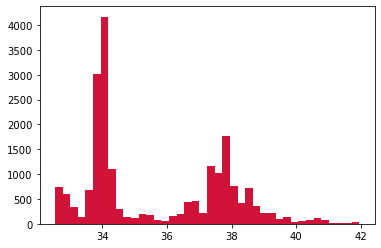

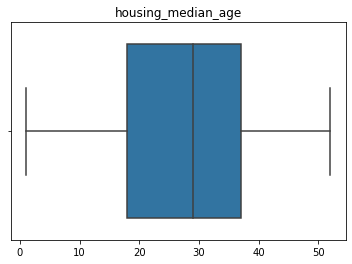

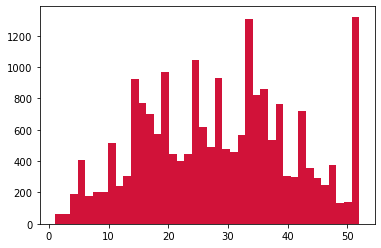

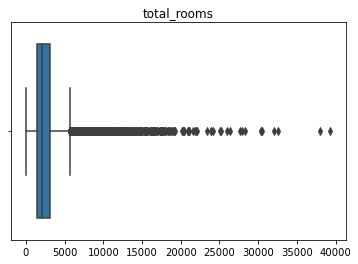

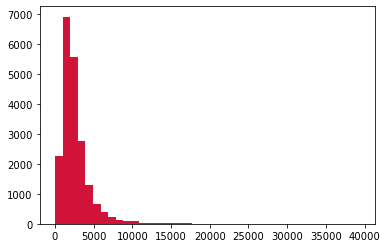

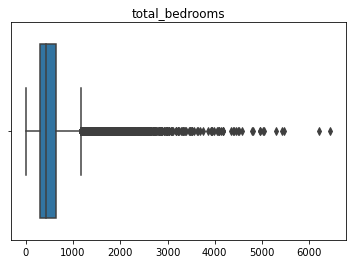

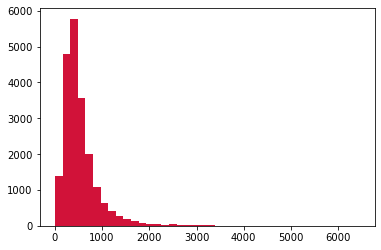

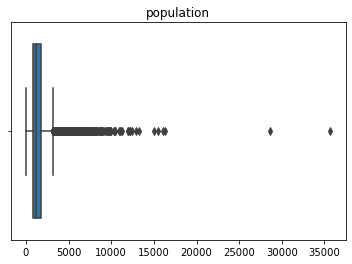

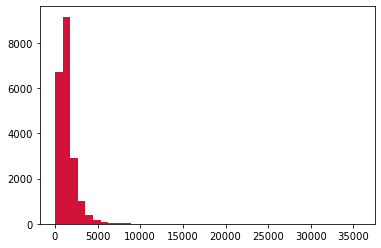

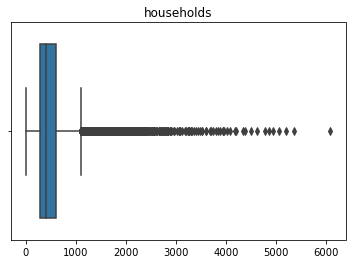

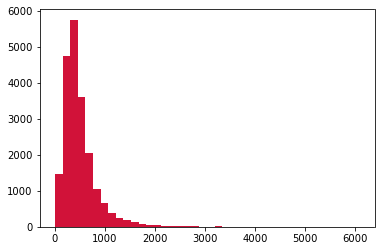

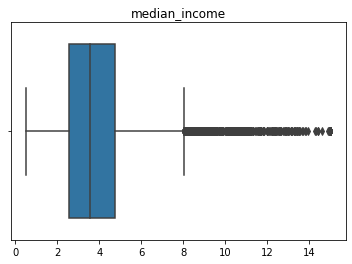

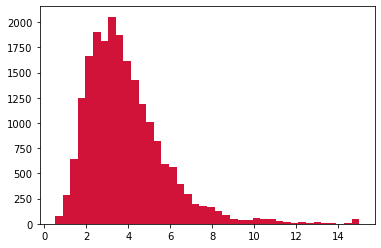

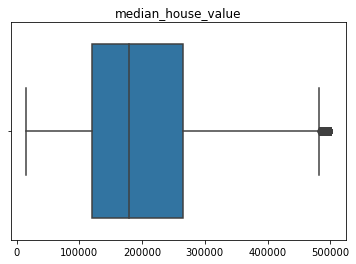

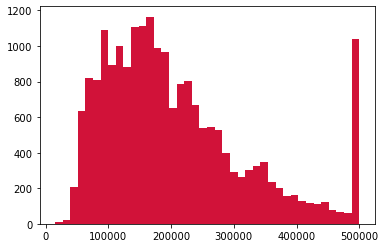

In [20]:
for col in df.columns:
    if df[col].dtype == 'float64':
        plot_outliers(df,col)
        plot_hist(df,col)

#### Bedrooms

In [21]:
firstQ = df['total_bedrooms'].quantile(0.25)
thirdQ = df['total_bedrooms'].quantile(0.75)
IQR = thirdQ - firstQ
IQR

346.25

In [22]:
newB = thirdQ + 3*(IQR)
df.drop(df[df['total_bedrooms']>newB].index, axis = 0, inplace =True)

In [23]:
df.shape

(20184, 10)

#### population

In [24]:
firstQ_p = df['population'].quantile(0.25)
thirdQ_p = df['population'].quantile(0.75)
IQR_p = thirdQ_p - firstQ_p
IQR_p

898.0

In [25]:
newB_p = thirdQ_p + 3*(IQR_p)
df.drop(df[df['population']>newB_p].index, axis = 0, inplace =True)
df.shape

(20025, 10)

#### households

In [26]:
firstQ_h = df['households'].quantile(0.25)
thirdQ_h = df['households'].quantile(0.75)
IQR_h = thirdQ_h - firstQ_h
IQR_h

305.0

In [27]:
newB_h = thirdQ_h + 3*(IQR_h)
df.drop(df[df['households']>newB_h].index, axis = 0, inplace =True)
df.shape

(19986, 10)

#### Total rooms

In [28]:
firstQ_t = df['total_rooms'].quantile(0.25)
thirdQ_t = df['total_rooms'].quantile(0.75)
IQR_t = thirdQ_t - firstQ_t
IQR_t

1586.0

In [29]:
newB_t = thirdQ_t + 3*(IQR_t)
df.drop(df[df['total_rooms']>newB_t].index, axis = 0, inplace =True)
df.shape

(19855, 10)

In [30]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19855.000000,19855.000000,19855.000000,19855.000000,19855.000000,19855.000000,19855.000000,19855.000000,19855.000000
mean,-119.591407,35.650936,29.153312,2342.482397,480.643264,1279.459280,449.132511,3.849380,206120.444271
std,2.003036,2.141464,12.422856,1343.135693,272.202236,727.702493,252.001974,1.895958,115652.421223
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.940000,19.000000,1425.000000,292.000000,774.000000,275.000000,2.551000,118500.000000
50%,-118.510000,34.270000,29.000000,2073.000000,426.000000,1139.000000,399.000000,3.517900,178600.000000
75%,-118.020000,37.720000,37.000000,2991.000000,612.000000,1643.000000,575.000000,4.714300,263900.000000
max,-114.310000,41.950000,52.000000,7754.000000,1646.000000,4367.000000,1496.000000,15.000100,500001.000000


--------
## EDA 

<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>

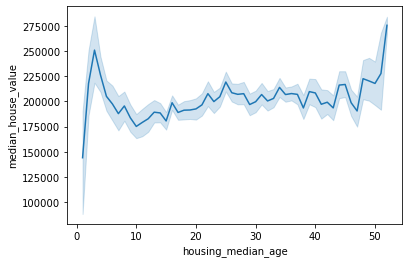

In [31]:
sns.lineplot(data=df, x="housing_median_age", y="median_house_value")   

#### Using `.corr()` to show the correlation between the columns

In [32]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924605,-0.098044,0.003978,0.041384,0.106120,0.032183,-0.016650,-0.045491
latitude,-0.924605,1.000000,0.000629,-0.006527,-0.050530,-0.127223,-0.062754,-0.079678,-0.145278
housing_median_age,-0.098044,0.000629,1.000000,-0.333454,-0.269588,-0.246823,-0.247483,-0.107382,0.114106
total_rooms,0.003978,-0.006527,-0.333454,1.000000,0.884602,0.786026,0.883381,0.227568,0.174922
total_bedrooms,0.041384,-0.050530,-0.269588,0.884602,1.000000,0.831967,0.967096,-0.063024,0.050382
population,0.106120,-0.127223,-0.246823,0.786026,0.831967,1.000000,0.875628,-0.048221,-0.055903
households,0.032183,-0.062754,-0.247483,0.883381,0.967096,0.875628,1.000000,-0.032113,0.070484
median_income,-0.016650,-0.079678,-0.107382,0.227568,-0.063024,-0.048221,-0.032113,1.000000,0.687141
median_house_value,-0.045491,-0.145278,0.114106,0.174922,0.050382,-0.055903,0.070484,0.687141,1.000000


In [33]:
df.corr()['median_house_value'].sort_values(ascending=False) 
#to show the correlation between median_house_value column and the other columns 

median_house_value    1.000000
median_income         0.687141
total_rooms           0.174922
housing_median_age    0.114106
households            0.070484
total_bedrooms        0.050382
longitude            -0.045491
population           -0.055903
latitude             -0.145278
Name: median_house_value, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

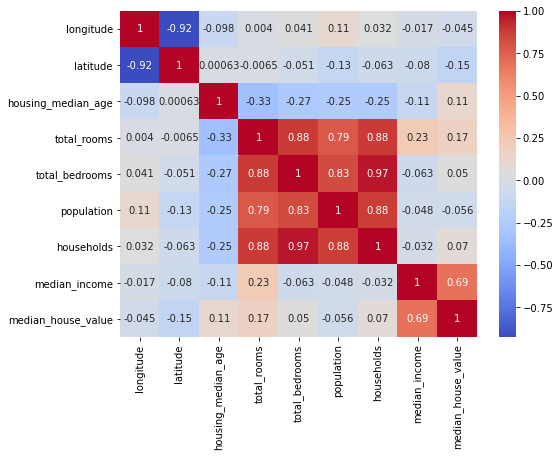

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show

#visualize the correlation

#### Using `.pairplot` to pairwise relationships in a dataset by creating a grid of Axes

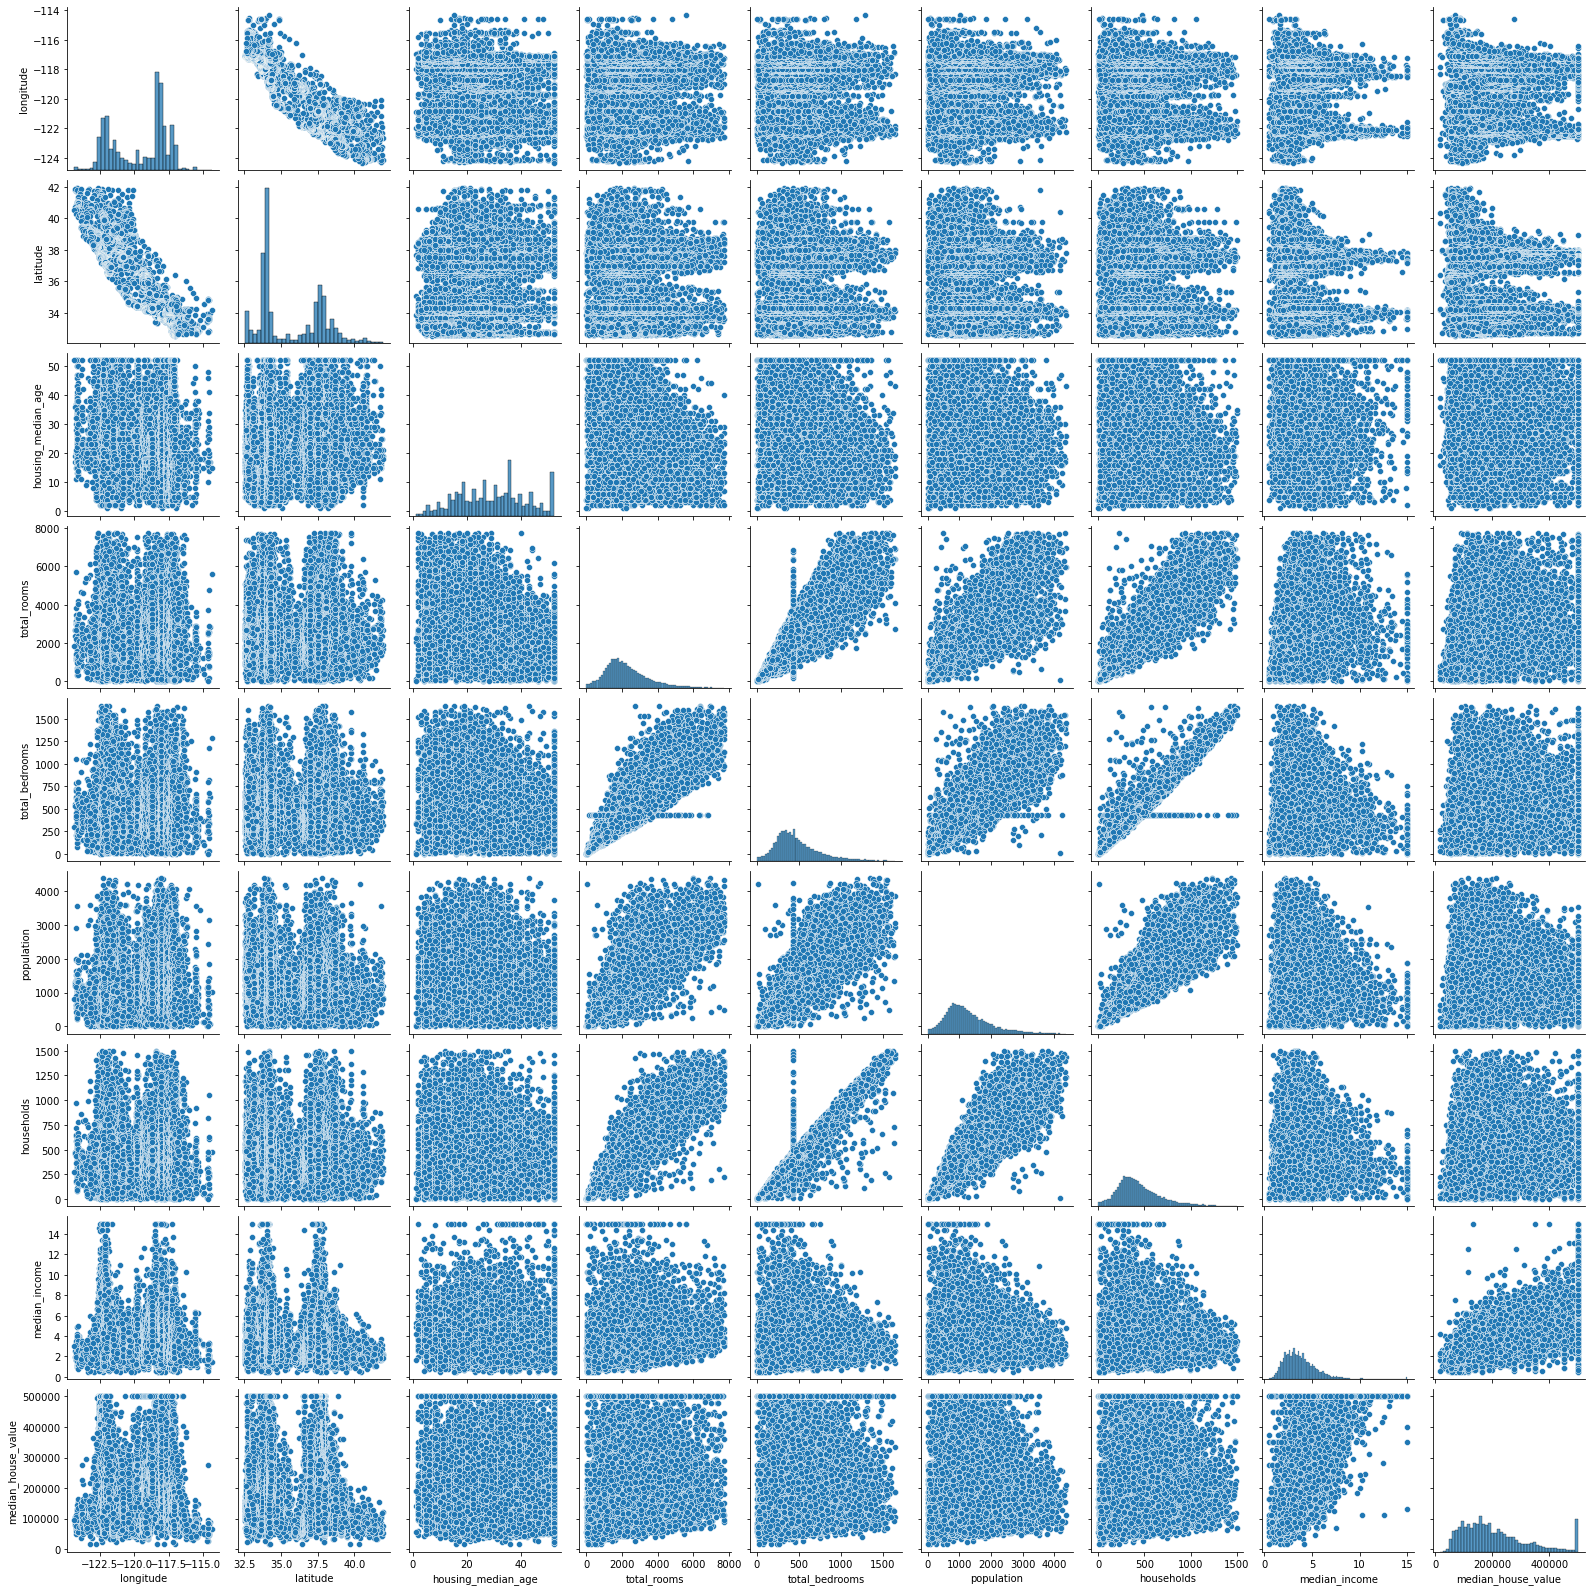

In [35]:
sns.pairplot(df)

#### Defining a function called `show_values()` to show values in my plots

In [36]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)


#### `.countplot()` to count how many time the variable has been repeated.

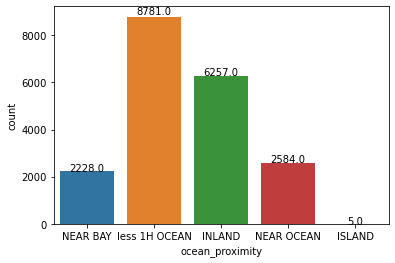

In [37]:
x1=sns.countplot(x=df['ocean_proximity'], data=df)
show_values(x1)

#### Using `.imread` in the map plot to insert an image

Text(0, 0.5, 'latitude')

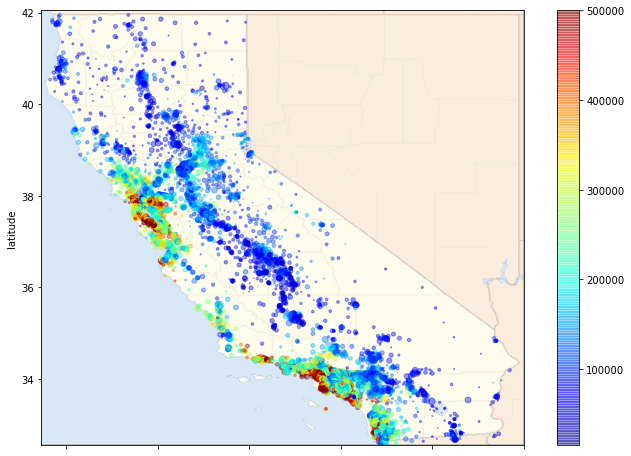

In [38]:
df.plot(kind = "scatter", x="longitude" , y="latitude" , c =df["median_house_value"], s =df["population"]/100,
        alpha = 0.4, cmap = plt.get_cmap("jet"), figsize = (12,8))


#load png image
map_image = mpimg.imread("california.png")

plt.imshow(map_image, extent = [-124.55, -114, 32.55, 42.05], alpha = 0.4, cmap = plt.get_cmap("jet"))

plt.xlabel("longitude")
plt.ylabel("latitude")

- the closer we are to the ocean, the more expensive the houses values become

#### Using `.get_dummies` to change the object value to (0,1) values

In [39]:
df = pd.get_dummies(df, prefix=None)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,ocean_proximity_less 1H OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0,0


---------------
## Define x , y

In [40]:
x = df.drop("median_house_value" , axis = 1).values
y = df['median_house_value'].values

In [41]:
x

array([[-122.23,   37.88,   41.  , ...,    1.  ,    0.  ,    0.  ],
       [-122.22,   37.86,   21.  , ...,    1.  ,    0.  ,    0.  ],
       [-122.24,   37.85,   52.  , ...,    1.  ,    0.  ,    0.  ],
       ...,
       [-121.22,   39.43,   17.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.32,   39.43,   18.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.24,   39.37,   16.  , ...,    0.  ,    0.  ,    0.  ]])

In [42]:
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

---------------

## Split dataset [ train - test ]

In [43]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=.2 ,random_state=0)

----------

## Train Model

In [44]:
my_model = LinearRegression()
my_model.fit(x_train , y_train)

LinearRegression()

-------
## Predict Value

In [45]:
y_predict = my_model.predict(x_test)
y_predict

array([152347.95254002, 100541.35421104,  44233.46511646, ...,
       187783.23550105, 303367.3438615 , 119633.36871774])